# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [80]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town 
    \ уровень преступности на душу населения по городам
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
    \ доля земли, зонированной для участков площадью более 25 000 кв.фут.
* INDUS: This is the proportion of non-retail business acres per town
    \ доля акров не-розничного бизнеса на город
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise) 
    \ фиктивная переменная реки Чарльза (она равна 1, если тракт ограничивает реку; 0 в противном случае)
* NOX: This is the nitric oxides concentration (parts per 10 million)
    \ концентрация оксидов азота (частей на 10 млн.)
* RM: This is the average number of rooms per dwelling
    \ среднее количество комнат на одно жилище
* AGE: This is the proportion of owner-occupied units built prior to 1940
    \ доля единиц, занятых владельцами, построенных до 1940 года
* DIS: This is the weighted distances to five Boston employment centers
    \ взвешенные расстояния до пяти бостонских центров занятости
* RAD: This is the index of accessibility to radial highways
    \ оказатель доступности радиальных магистралей 
* TAX: This is the full-value property-tax rate per 10,000 dollars
    \ полная ставка налога на недвижимость в расчете на 10 000 долларов
* PTRATIO: This is the pupil-teacher ratio by town
    \ соотношение учеников и учителей по городам
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
    \ рассчитывается как 1000*(Bk-0.63)**2, где Bk-доля лиц афроамериканского происхождения по городам
* LSTAT: This is the percentage lower status of the population
    \ доля населения с более низким статусом
* MEDV: This is the median value of owner-occupied homes in 1000 dollars
    \ медианная стоимость занимаемых владельцами домов в 1000 долларов

In [81]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



In [ ]:
# визуально:
# нормальное распределение: RM (больше других похоже, но, возможно, логнормальное)
# Бернулли: CHAS
# логнормальное: DIS, LSTAT, MEDV


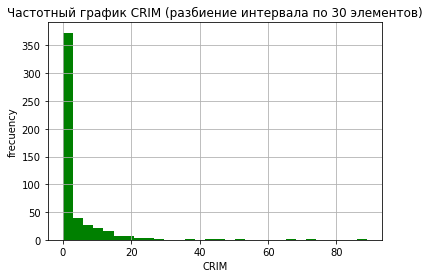

In [15]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(data['CRIM'], 30, facecolor='g')

plt.xlabel('CRIM')
plt.ylabel('frecuency')
plt.title('Частотный график CRIM (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

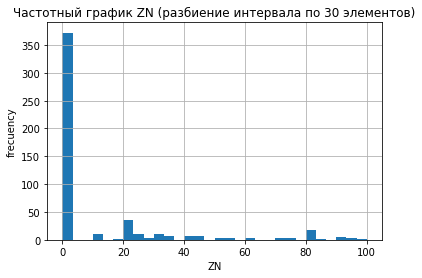

In [31]:
n, bins, patches = plt.hist(data['ZN'], 30)

plt.xlabel('ZN')
plt.ylabel('frecuency')
plt.title('Частотный график ZN (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

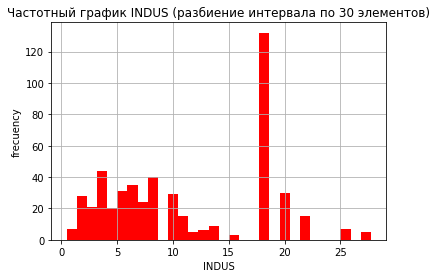

In [35]:
n, bins, patches = plt.hist(data['INDUS'], 30, facecolor='r')

plt.xlabel('INDUS')
plt.ylabel('frecuency')
plt.title('Частотный график INDUS (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

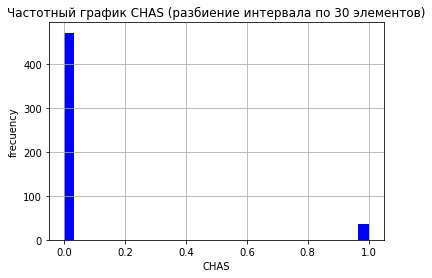

In [40]:
n, bins, patches = plt.hist(data['CHAS'], 30, facecolor='b')

plt.xlabel('CHAS')
plt.ylabel('frecuency')
plt.title('Частотный график CHAS (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

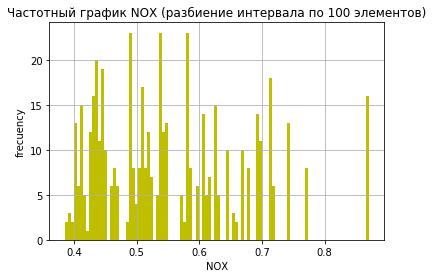

In [64]:
n, bins, patches = plt.hist(data['NOX'], 100, facecolor='y')

plt.xlabel('NOX')
plt.ylabel('frecuency')
plt.title('Частотный график NOX (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

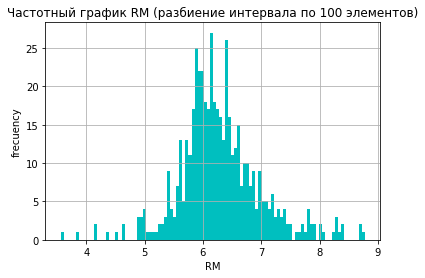

In [29]:
n, bins, patches = plt.hist(data['RM'], 100, facecolor='c')

plt.xlabel('RM')
plt.ylabel('frecuency')
plt.title('Частотный график RM (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

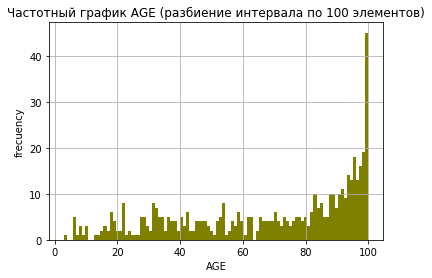

In [33]:
n, bins, patches = plt.hist(data['AGE'], 100, facecolor='olive')

plt.xlabel('AGE')
plt.ylabel('frecuency')
plt.title('Частотный график AGE (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

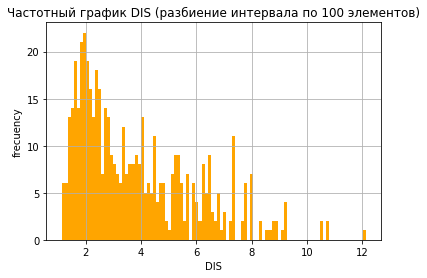

In [42]:
n, bins, patches = plt.hist(data['DIS'], 100, facecolor='orange')
plt.xlabel('DIS')
plt.ylabel('frecuency')
plt.title('Частотный график DIS (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

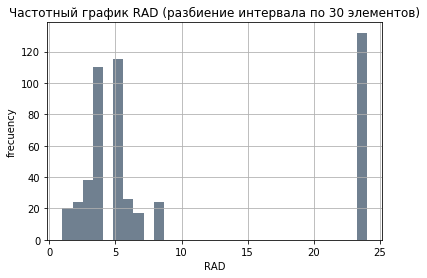

In [64]:
n, bins, patches = plt.hist(data['RAD'], 30, facecolor='slategrey')
plt.xlabel('RAD')
plt.ylabel('frecuency')
plt.title('Частотный график RAD (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

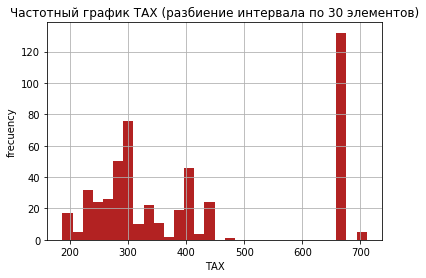

In [66]:
n, bins, patches = plt.hist(data['TAX'], 30, facecolor='firebrick')
plt.xlabel('TAX')
plt.ylabel('frecuency')
plt.title('Частотный график TAX (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

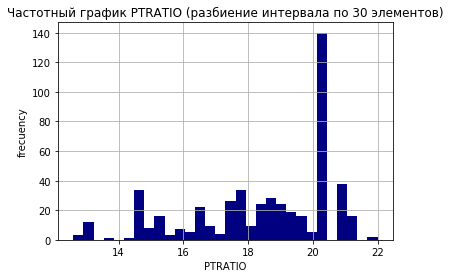

In [38]:
n, bins, patches = plt.hist(data['PTRATIO'], 30, facecolor='navy')
plt.xlabel('PTRATIO')
plt.ylabel('frecuency')
plt.title('Частотный график PTRATIO (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

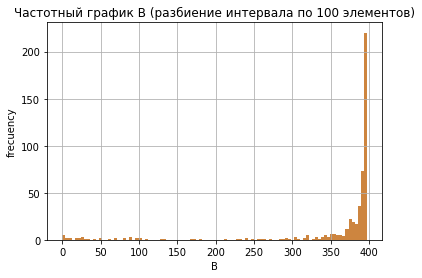

In [43]:
n, bins, patches = plt.hist(data['B'], 100, facecolor='peru')
plt.xlabel('B')
plt.ylabel('frecuency')
plt.title('Частотный график B (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

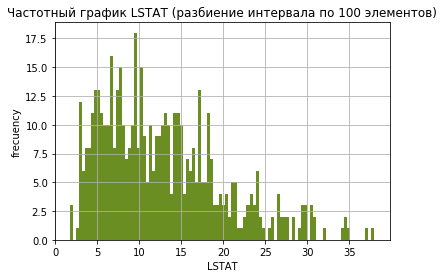

In [46]:
n, bins, patches = plt.hist(data['LSTAT'], 100, facecolor='olivedrab')
plt.xlabel('LSTAT')
plt.ylabel('frecuency')
plt.title('Частотный график LSTAT (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

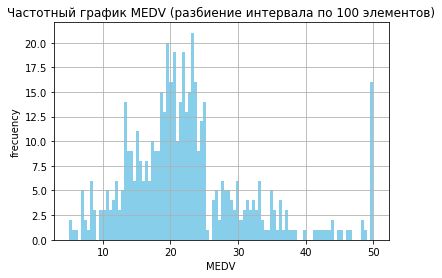

In [61]:
n, bins, patches = plt.hist(data['MEDV'], 100, facecolor='skyblue')
plt.xlabel('MEDV')
plt.ylabel('frecuency')
plt.title('Частотный график MEDV (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

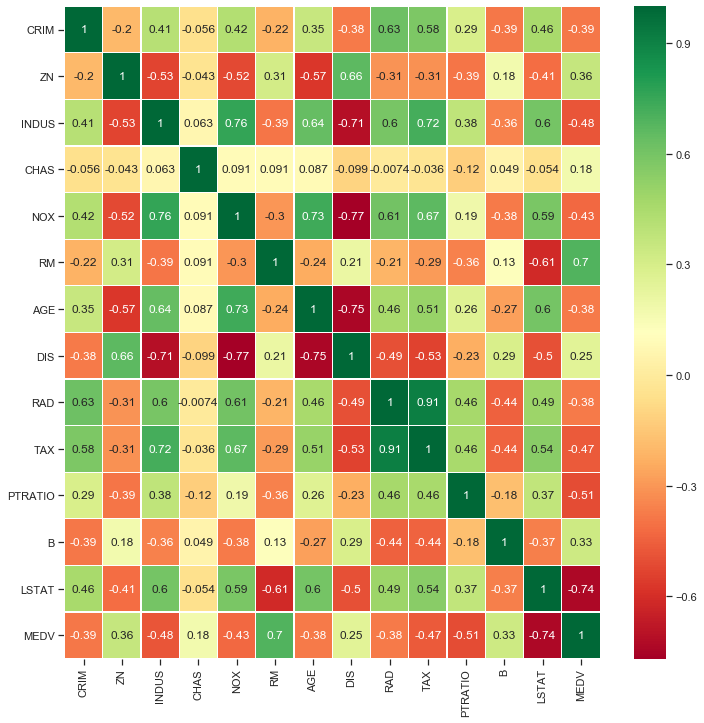

In [32]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# максимально коррелирующие с ценой на дома (MEDV) атрибуты:
# LSTAT (коэффициент коррелляции -0.74) - чем выше доля населения с более нихким статусом, тем ниже стоимость жилья
# RM (коэффициент коррелляции 0.7) - чем больше кол-во комнат, тем дороже стоимость жилья


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [8]:
LSTAT = np.array(LSTAT).reshape(-1,1) 
MEDV = np.array(MEDV).reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split

# x = LSTAT,
# y = MEDV - зависимая
X_train, X_test, y_train, y_test = train_test_split(
    LSTAT,
    MEDV,
    test_size = 0.2 # делим модель
)

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
predicted_y = model.predict(X_test)

In [14]:
model.score(X_test, y_test)

0.5252548124027631

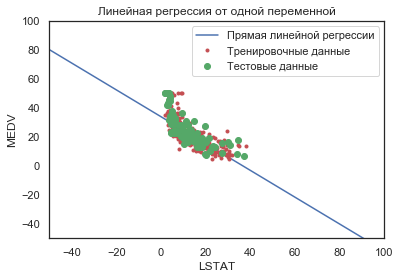

In [23]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 100, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,100)
plt.ylim(-50,100)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

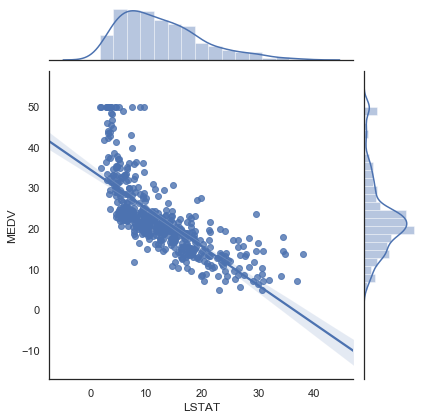

In [21]:
LSTAT = data['LSTAT']
MEDV = data['MEDV']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=LSTAT, y=MEDV, data=data, kind='reg')
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [71]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()
# https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [74]:
# data.info()
# data.isnull().sum()

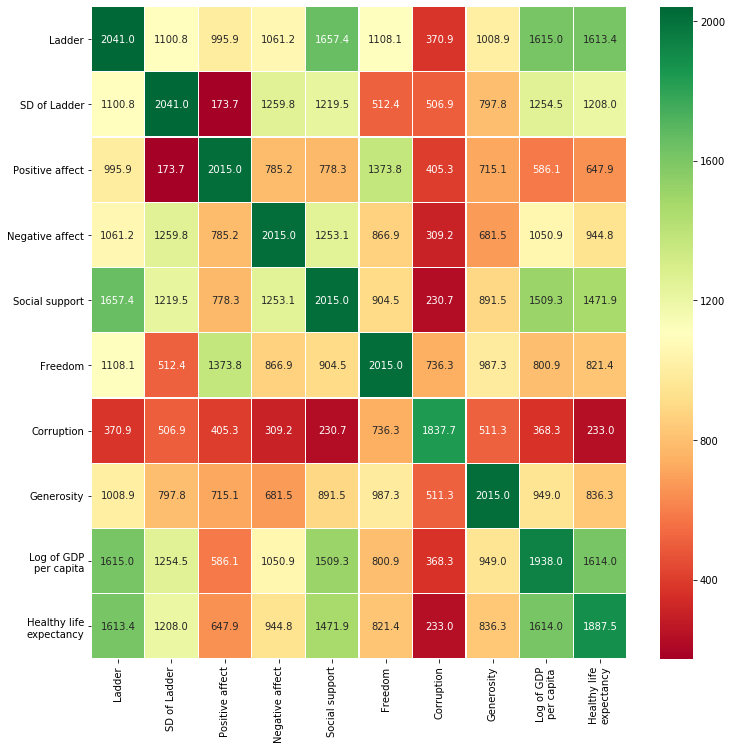

In [6]:
# Посчитать матрицу ковариаций попарно
import seaborn as sns
sns.heatmap(data.cov(),annot=True,cmap='RdYlGn', fmt='.1f', linewidths=0.2)
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [3]:
# data[['Log of GDP\nper capita', 'Healthy life\nexpectancy']].cov()

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [9]:
# всего 23 отсутствующих значения:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [10]:
# В столбце 'Country (region)' нет отсутствующих значений (см. выше), дополнительно:
data[data['Country (region)'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy


Сколько стран в выборке? Написать ответ. 

In [11]:
# data['Country (region)'].unique()
# data['Country (region)'].value_counts()
data['Country (region)'].nunique() # или data.info()

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

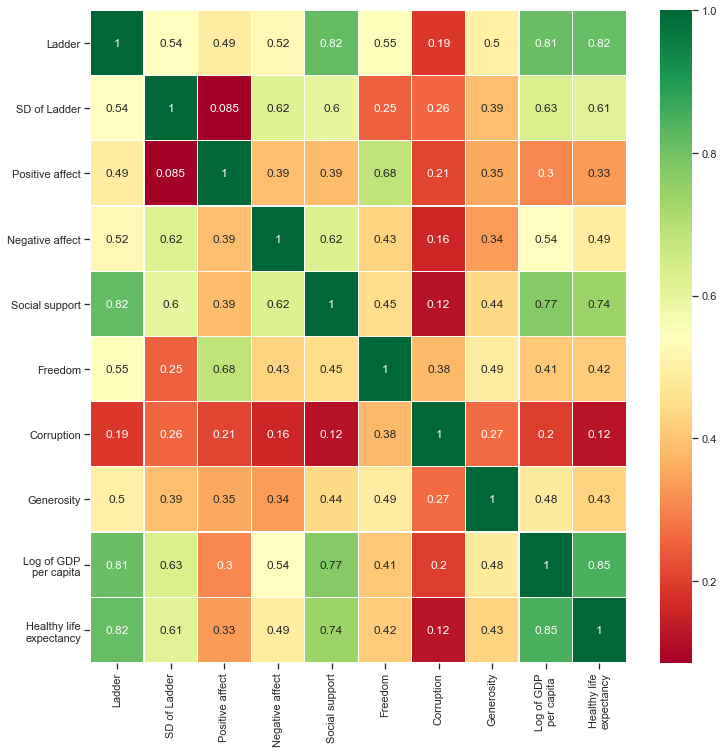

In [20]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# Какие можно сделать выводы?

# На показатель удовлетворенности жизнью больше всего влияют такие атрибуты как ожидаемая продолжительность здоровой жизни,
# социальная поддержка и ВВП на душу населения. Эта зависимость - прямая.
# Меньше всего показатель удовлетворенности жизнью зависит от уровня коррупции в стране.
# Остальные рассматриваемые атрибуты влияют на изменение показателя удовлетворенности жизнью примерно в равной степени.
# Некоторые атрибуты значительно коррелируют между собой. Самая значительная корреляция наблюдается у Healthy life expectancy и 
# Log of GDP per capita (коэффициент корреляции 0.85).
# Все коэффициенты корреляции в таблице имеют положительное значение, т.е. связь во всех случаях - прямая.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [5]:
import pylab
import random

In [68]:
number_of_trials = 10
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(random.randint(1,6))

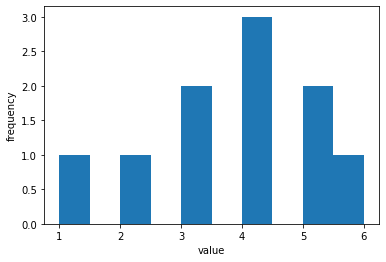

In [69]:
n, bins, pathes = plt.hist(list_of_values)
# n, bins, patches = plt.hist(df[''], 10, facecolor='g')
plt.xlabel('value')
plt.ylabel('frequency')
# plt.title('Частотный график для эксперимента с подбрасыванием кубика')
# plt.grid(True)
plt.show()

In [ ]:
# это распределение - стремящееся к равномерному (чем больше подкидываний, тем ближе к нему) 
# (исход подбрасвания кубика - дискретная сл. величина)

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [64]:
number_of_trials = 100
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(random.randint(1,6))

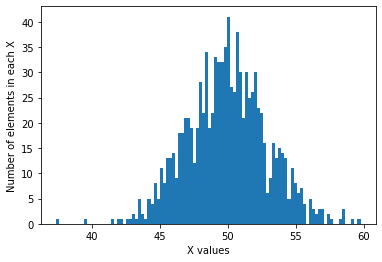

In [65]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums]) # создаем массив и заполняем его нулями
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(np.random.rand(number_of_trials))
plt.hist(X1, 100)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

In [ ]:
# Почему график изменился? 
# Потому что новая выборка формируется из сумм подбрасываний и кол-во этих элементов дост. большое. Распределение сумм подбрасываний
# стремится к нормальному. 

# Почему можно применить центральную предельную теорему?
# Новая выборка состоит из достаточно большого количества элементов.

In [ ]:
# Следующее задание есть только в файле на colab:

Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материков 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Как определить, к какому материку относится тот или иной элемент? 
Можно написать словарь, в котором ключ - страна, а значение - это материк для данной страны.

Список стран по континентам: https://simple.wikipedia.org/wiki/List_of_countries_by_continents. 

Как работать со словарями - https://pythonworld.ru/tipy-dannyx-v-python/slovari-dict-funkcii-i-metody-slovarej.html


Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента, это **проблема классификации**. 

In [24]:
# Country and Continent Codes List
# https://datahub.io/JohnSnowLabs/country-and-continent-codes-list

# http://statisticstimes.com/geography/countries-by-continents.php

In [72]:
countries = {'Algeria':'Africa', 'Benin':'Africa', 'Botswana':'Africa', 'Burkina Faso': 'Africa', 'Burundi':'Africa',\
           'Cameroon':'Africa', 'Central African Republic':'Africa', 'Chad':'Africa', 'Comoros':'Africa', \
           'Congo (Brazzaville)':'Africa', 'Congo (Kinshasa)':'Africa', 'Egypt':'Africa', 'Ethiopia':'Africa',\
           'Gabon':'Africa', 'Gambia':'Africa', 'Ghana':'Africa', 'Guinea':'Africa', 'Ivory Coast':'Africa', 'Kenya':'Africa',\
           'Lesotho':'Africa', 'Liberia':'Africa', 'Libya':'Africa', 'Madagascar':'Africa', 'Malawi':'Africa', \
           'Mali':'Africa', 'Mauritania':'Africa', 'Mauritius':'Africa','Morocco':'Africa', 'Mozambique':'Africa',\
           'Namibia':'Africa', 'Niger':'Africa', 'Nigeria':'Africa', 'Rwanda':'Africa', 'Senegal':'Africa', 'Sierra Leone':'Africa',\
           'Somalia':'Africa', 'South Africa':'Africa', 'South Sudan':'Africa', 'Swaziland':'Africa', 'Tanzania':'Africa',\
           'Togo':'Africa', 'Tunisia':'Africa', 'Uganda':'Africa','Zambia':'Africa', 'Zimbabwe':'Africa',\
           'Antarctica':'Antarctica', 'Afghanistan': 'Eurasia','Albania':'Eurasia', 'Armenia':'Eurasia', 'Austria':'Eurasia',\
           'Azerbaijan':'Eurasia', 'Bahrain':'Eurasia','Bangladesh':'Eurasia', 'Belarus':'Eurasia', 'Belgium':'Eurasia',\
           'Bhutan':'Eurasia', 'Bosnia and Herzegovina ':'Eurasia', 'Bulgaria':'Eurasia', 'Cambodia':'Eurasia', 'China':'Eurasia',\
           'Croatia':'Eurasia', 'Cyprus':'Eurasia','Czech Republic':'Eurasia', 'Denmark':'Eurasia', 'Estonia':'Eurasia',\
           'Finland':'Eurasia', 'France':'Eurasia', 'Georgia':'Eurasia', 'Germany':'Eurasia', 'Greece':'Eurasia', \
           'Hong Kong':'Eurasia', 'Hungary':'Eurasia', 'Iceland':'Eurasia', 'India':'Eurasia', 'Indonesia':'Eurasia',\
           'Iran':'Eurasia', 'Iraq':'Eurasia', 'Ireland':'Eurasia', 'Israel':'Eurasia', 'Italy':'Eurasia', 'Japan':'Eurasia',\
           'Jordan':'Eurasia','Kazakhstan':'Eurasia', 'Kosovo':'Eurasia', 'Kuwait':'Eurasia', 'Kyrgyzstan':'Eurasia',\
           'Laos':'Eurasia', 'Latvia':'Eurasia', 'Lebanon':'Eurasia', 'Lithuania':'Eurasia', 'Luxembourg':'Eurasia',\
           'Macedonia':'Eurasia', 'Malaysia':'Eurasia', 'Malta':'Eurasia', 'Moldova':'Eurasia', 'Mongolia':'Eurasia',\
           'Montenegro':'Eurasia', 'Myanmar':'Eurasia', 'Nepal':'Eurasia', 'Netherlands':'Eurasia', 'Northern Cyprus':'Eurasia',\
           'Norway':'Eurasia', 'Pakistan':'Eurasia', 'Palestinian Territories':'Eurasia', 'Philippines':'Eurasia',\
           'Poland':'Eurasia', 'Portugal':'Eurasia', 'Qatar':'Eurasia', 'Romania':'Eurasia', 'Russia':'Eurasia',\
           'Saudi Arabia':'Eurasia', 'Serbia':'Eurasia', 'Singapore':'Eurasia', 'Slovakia':'Eurasia', 'Slovenia':'Eurasia',\
           'South Korea':'Eurasia', 'Spain':'Eurasia', 'Sri Lanka':'Eurasia', 'Sweden':'Eurasia', 'Switzerland':'Eurasia',\
           'Syria':'Eurasia', 'Taiwan':'Eurasia', 'Tajikistan':'Eurasia', 'Thailand':'Eurasia', 'Turkey':'Eurasia',\
           'Turkmenistan':'Eurasia', 'Ukraine':'Eurasia', 'United Arab Emirates':'Eurasia', 'United Kingdom':'Eurasia',\
           'Uzbekistan':'Eurasia', 'Vietnam':'Eurasia', 'Yemen':'Eurasia', 'Canada':'North America', 'Costa Rica':'North America',\
           'Dominican Republic':'North America', 'El Salvador':'North America', 'Guatemala':'North America', 'Haiti':'North America',\
           'Honduras':'North America', 'Jamaica':'North America', 'Mexico':'North America', 'Nicaragua':'North America',\
           'Panama':'North America', 'Trinidad and Tobago': 'North America', 'United States':'North America', 'Australia':'Oceania',\
           'New Zealand':'Oceania', 'Argentina':'South America', 'Bolivia':'South America', 'Brazil':'South America',\
           'Chile':'South America', 'Colombia':'South America', 'Ecuador':'South America', 'Paraguay':'South America',\
           'Peru':'South America', 'Uruguay':'South America', 'Venezuela':'South America', 'Antarctica':'Antarctica',\
           'Bouvet Island (Bouvetoya)':'Antarctica', 'French Southern Territories':'Antarctica', \
           'Heard Island and McDonald Islands':'Antarctica', 'South Georgia and the South Sandwich Islands': 'Antarctica'}

In [73]:
data['Continent'] = data['Country (region)'].map(countries)

In [74]:
data[data['Continent'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Continent


In [61]:
# data.loc[(data['Country (region)'] == 'Bosnia and Herzegovina ')]

In [75]:
# data.loc[(data.Continent == 'Oceania')]
data.Continent.value_counts()

Eurasia          86
Africa           45
North America    13
South America    10
Oceania           2
Name: Continent, dtype: int64

In [15]:
# data.info()

In [76]:
data1 = data[['Ladder', 'SD of Ladder', 'Positive affect', 'Negative affect', 'Social support', 'Continent']]
# data1.head()
data2 = data[['Freedom', 'Corruption', 'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy', 'Continent']]

Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

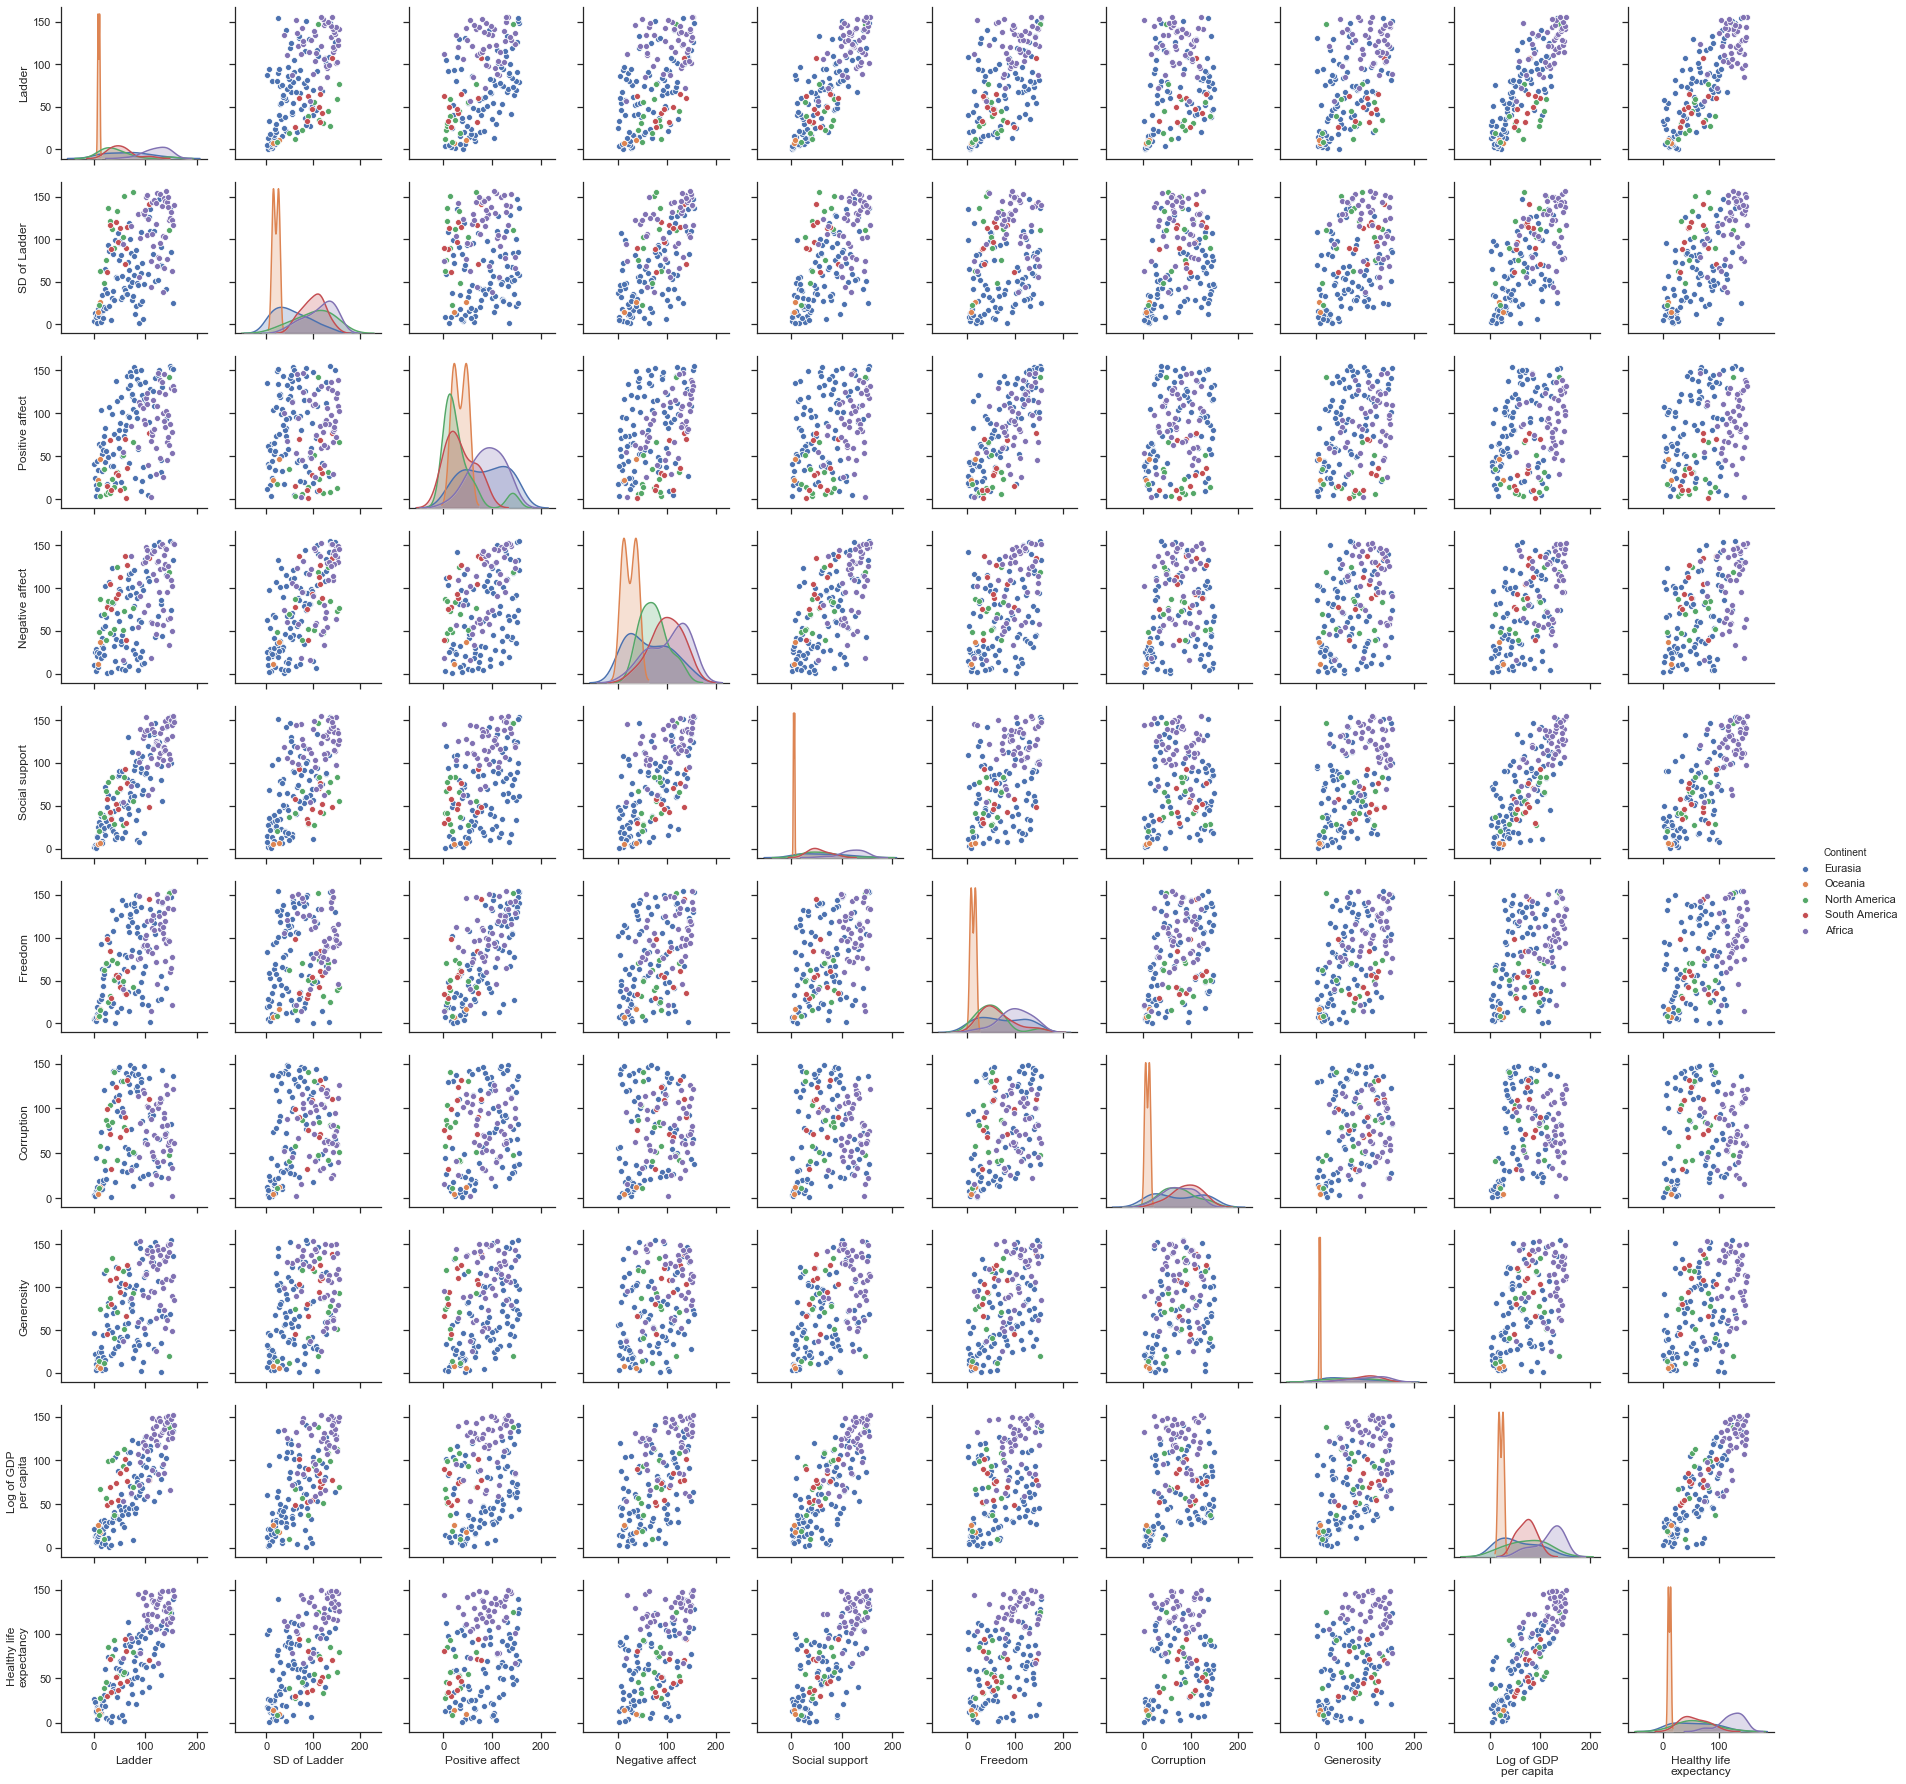

In [22]:
fig = sns.pairplot(data=data, hue='Continent') 
plt.show()

In [ ]:
# Практически по всем показателям отличается Oceania, но в датафрейме - лишь 2 значения по этому континенту. 
# Поэтому - не показательно.
# Визуально, похожи Северная и Южная Америка (по ним выборки тоже маленькие)

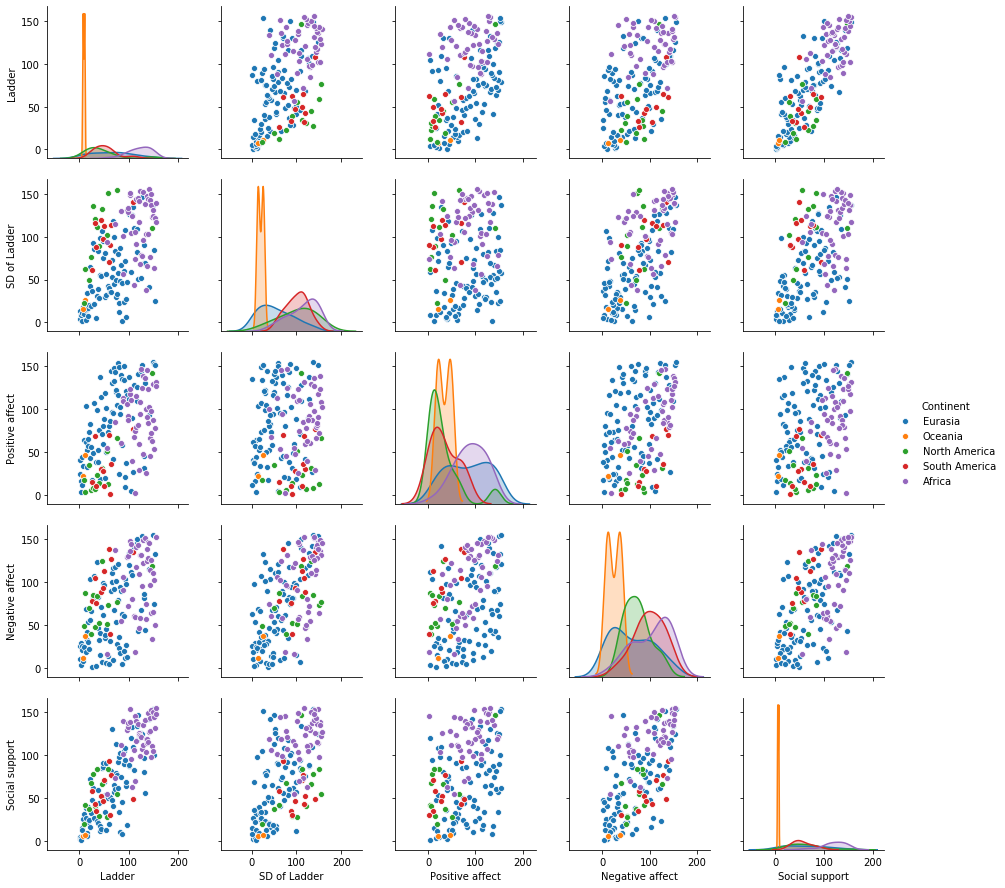

In [78]:
fig = sns.pairplot(data=data1, hue='Continent') 
plt.show()

*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

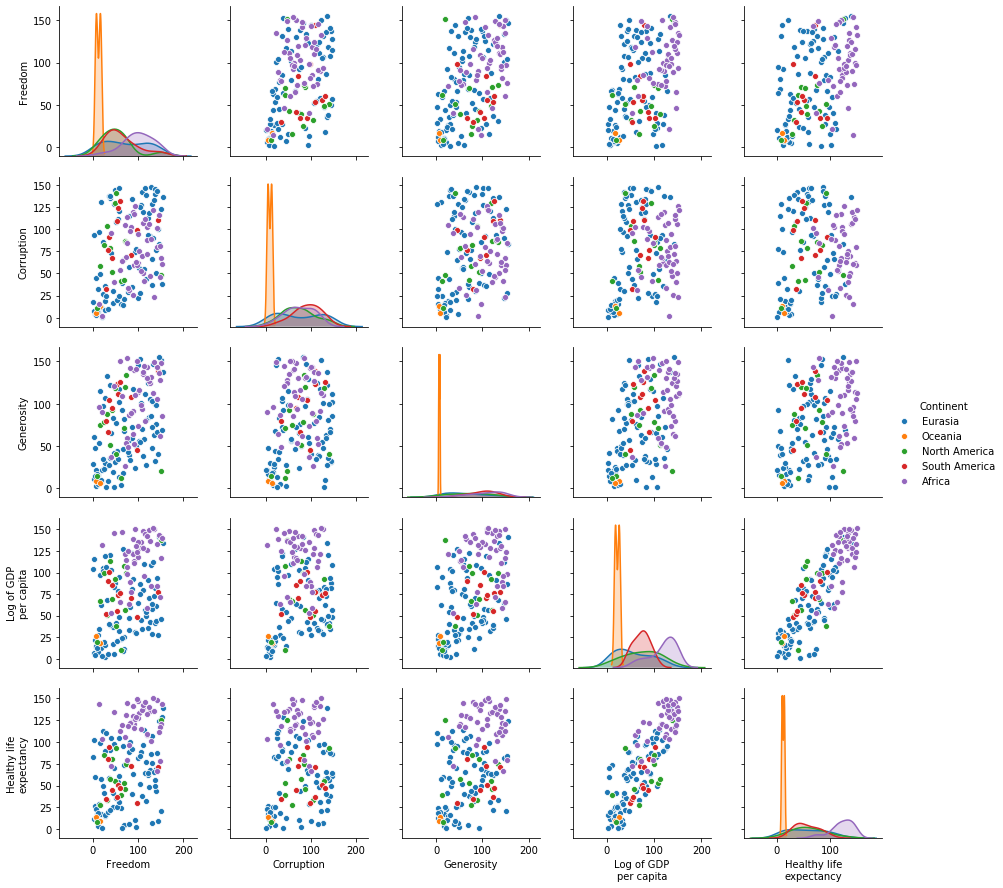

In [79]:
fig = sns.pairplot(data=data2, hue='Continent') 
plt.show()